In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import numpy as np  # For calculating text rotation

import math

def radians_to_degrees(radians):
    degrees = radians * (180 / math.pi)
    return degrees

# Define the etymology data for "extraordinary"
etymology_data = {
  "word": "pseudopseudohypoparathyroidism",
  "meaning": "a medical condition that mimics the symptoms of the condition known as pseudohypoparathyroidism, but without the associated biochemical abnormalities.",
  "language": "English",
  "synonyms_in_other_languages": {
    "japanese": "偽偽副甲状腺機能低下症",
    "arabic": "الكاذب المزيف لنقص نشاط الغدة جار الدرقية",
    "french": "pseudopseudohypoparathyroïdisme",
    "chinese": "假性假性甲状旁腺功能减退症"
  },
  "history": "The term describes a rare inherited disorder that affects the bones and growth. Its name reflects the complexity of diagnosing endocrine disorders.",
  "parts": [
    {
      "part": "pseudo",
      "type": "prefix"
    },
    {
      "part": "pseudo",
      "type": "prefix"
    },
    {
      "part": "hypo",
      "type": "prefix"
    },
    {
      "part": "para",
      "type": "prefix"
    },
    {
      "part": "thyroid",
      "type": "root"
    },
    {
      "part": "ism",
      "type": "suffix"
    }
  ],
  "etymology": [
    {
      "part": "pseudo",
      "meaning": "false, deceptive",
      "example_words": ["pseudonym", "pseudoscience"],
      "language": "Greek",
      "history": "Derived from Greek 'pseudēs' meaning false and 'pseudos' meaning falsehood.",
      "tracing": ["pseudo <-- pseudēs (Greek) <-- pseudos (falsehood)"],
      "etymology": [
        {
          "part": "pseudos",
          "meaning": "falsehood, lie",
          "language": "Ancient Greek",
          "history": "Used in Greek literature and philosophy to denote something that is false or not genuine.",
          "example_words": ["pseudology", "pseudomorph"],
          "tracing": ["pseudos <-- Proto-Indo-European *bhaudh- (to be aware, make aware)"]
        }
      ]
    },
    {
      "part": "hypo",
      "meaning": "under, below normal",
      "example_words": ["hypoglycemia", "hypotension"],
      "language": "Greek",
      "history": "Comes from Greek 'hypo' meaning under or below.",
      "tracing": ["hypo <-- hypo (Greek)"],
      "etymology": [
        {
          "part": "hypo",
          "meaning": "under, below",
          "language": "Ancient Greek",
          "history": "Frequently used in medical and scientific terms to indicate a deficiency or lower-than-normal condition.",
          "example_words": ["hypodermic", "hypothermia"],
          "tracing": ["hypo <-- Proto-Indo-European *upo (under, below)"]
        }
      ]
    },
    {
      "part": "para",
      "meaning": "beside, near, resembling",
      "example_words": ["parallel", "paradox"],
      "language": "Greek",
      "history": "Derived from Greek 'para' meaning beside, near, or related to.",
      "tracing": ["para <-- para (Greek)"],
      "etymology": [
        {
          "part": "para",
          "meaning": "beside, beyond",
          "language": "Ancient Greek",
          "history": "Used in various contexts to indicate proximity, similarity, or adjacency.",
          "example_words": ["paraprofessional", "paramilitary"],
          "tracing": ["para <-- Proto-Indo-European *per- (forward, through)"]
        }
      ]
    },
    {
      "part": "thyroid",
      "meaning": "a gland in the neck that secretes hormones regulating growth and development",
      "example_words": ["thyroidectomy", "thyrotoxicosis"],
      "language": "Greek",
      "history": "Derived from Greek 'thyreos' (shield) and 'oeides' (form), referring to the shield-like shape of the gland.",
      "tracing": ["thyroid <-- thyreos + oeides (Greek)"],
      "etymology": [
        {
          "part": "thyreos",
          "meaning": "large shield",
          "language": "Ancient Greek",
          "history": "Refers to a type of large, door-shaped shield used in ancient Greece.",
          "example_words": ["thyreoid", "thyreotoxic"],
          "tracing": ["thyreos <-- Proto-Indo-European *terə- (to rub, turn)"]
        },
        {
          "part": "oeides",
          "meaning": "form, shape",
          "language": "Ancient Greek",
          "history": "Used to denote shape or resemblance in various compound words.",
          "example_words": ["anthropoid", "cyclopean"],
          "tracing": ["oeides <-- Proto-Indo-European *eid- (to see, to know)"]
        }
      ]
    },
    {
      "part": "ism",
      "meaning": "a distinctive practice, system, or philosophy",
      "example_words": ["capitalism", "socialism"],
      "language": "Greek",
      "history": "Derived from Greek suffix '-ismos', indicating a practice, system, or behavior.",
      "tracing": ["ism <-- ismos (Greek)"],
      "etymology": [
        {
          "part": "ismos",
          "meaning": "forming action nouns from verbs",
          "language": "Ancient Greek",
          "history": "Utilized in Greek to form nouns that denote a practice, system, or characteristic behavior.",
          "example_words": ["tourism", "plagiarism"],
          "tracing": ["ismos <-- Proto-Indo-European *dhe- (to set, put)"]
        }
      ]
    }
  ]
}

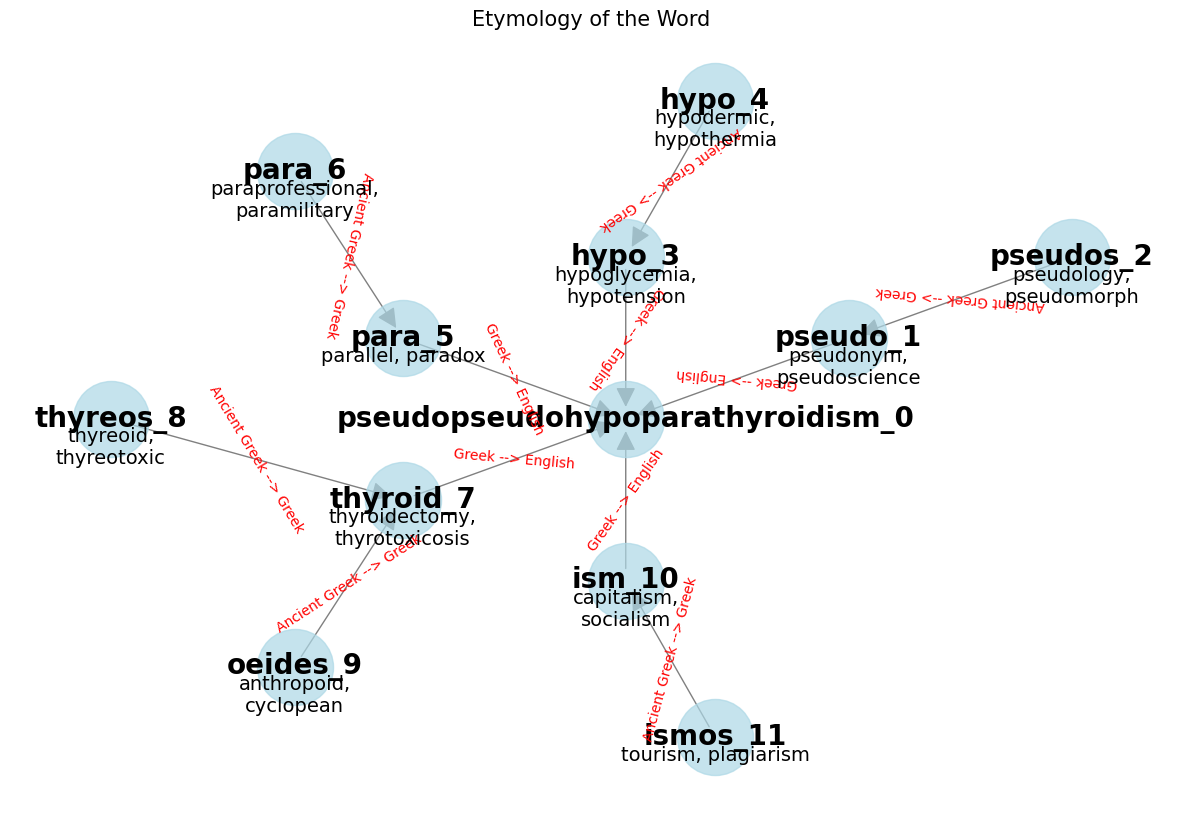

In [1]:
# Initialize a counter for unique node IDs
node_id_counter = 0

# Create a directed graph
G = nx.DiGraph()

def add_to_graph(graph, data, parent=None, node_id_counter=0):
    global_id = node_id_counter  # Use global counter to ensure uniqueness
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    node = f"{node_data['part']}_{global_id}"
    graph.add_node(node, **node_data)
    if parent and parent != node:  # Prevent self-loops
        graph.add_edge(parent, node)
    local_id = global_id + 1  # Increment ID for child nodes
    for child in data.get('etymology', []):
        local_id = add_to_graph(graph, child, parent=node, node_id_counter=local_id)
    return local_id  # Return updated counter

# Adding root node
node_id_counter = add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"]}, node_id_counter=node_id_counter)


# Calculate depths for each node from the root
depths = {}
def calculate_depths(node, depth=0):
    depths[node] = depth
    for successor in G.successors(node):
        calculate_depths(successor, depth+1)

root_node = next(iter(G.nodes))  # Assuming the first node is the root
calculate_depths(root_node)

# Determine the maximum depth to adjust circle sizes
max_depth = max(depths.values())

# Group nodes by depth
nodes_by_depth = {}
for node, depth in depths.items():
    if depth not in nodes_by_depth:
        nodes_by_depth[depth] = []
    nodes_by_depth[depth].append(node)

# Calculate positions with a reserved horizontal region
pos = {root_node: (0, 0)}  # Start with the root node at the center
radius_increment = 2  # Increment radius for each depth level
reserved_angle = 30  # Degrees to leave empty on each side of the horizontal axis

for depth, nodes in nodes_by_depth.items():
    if depth == 0:
        continue  # Skip the root node
    radius = depth * radius_increment
    # Adjust the total angle used for nodes to exclude the reserved horizontal region
    total_angle = 360 - (2 * reserved_angle)
    angle_increment = total_angle / len(nodes)
    start_angle = reserved_angle  # Starting angle to leave horizontal region empty
    for i, node in enumerate(nodes):
        angle = np.radians(start_angle + i * angle_increment)
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
        
# Plotting
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=20, font_weight="bold")

# Adjust labels and text
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx)) + 145

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

for node, (x, y) in pos.items():
    examples = ", ".join(G.nodes[node].get('example_words', []))
    wrapped_text = textwrap.fill(examples, width=20)
    plt.text(x, y - 0.1, wrapped_text, fontsize=14, ha='center', va='top', wrap=True)

plt.title('Etymology of the Word', fontsize=15)
plt.axis('off')
plt.show()

node:  pseudo
angle:  29.999999999999996
node:  hypo
angle:  90.0
node:  para
angle:  150.0
node:  thyroid
angle:  210.00000000000003
node:  ism
angle:  270.0
node:  pseudos
angle:  29.999999999999996
node:  hypo
angle:  80.0
node:  para
angle:  130.0
node:  thyreos
angle:  180.0
node:  oeides
angle:  230.0
node:  ismos
angle:  280.0


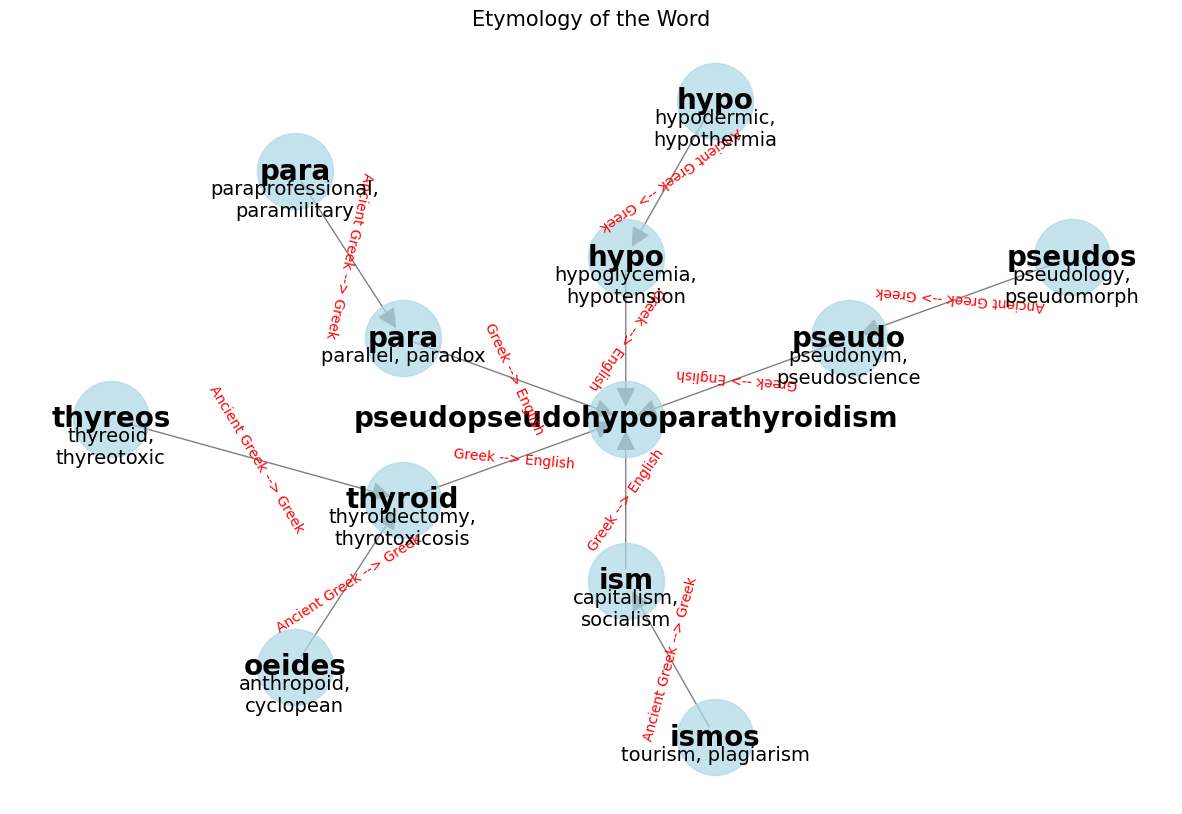

In [6]:
# Assign unique IDs to each part of the original JSON
def assign_ids(data, current_id=0):
    data['id'] = current_id  # Assign an ID to the current level
    current_id += 1  # Increment ID for the next assignment
    for part in data.get('etymology', []):  # Recursively assign IDs to nested parts
        current_id = assign_ids(part, current_id)
    return current_id  # Return updated ID counter

# Initialize unique ID assignment
assign_ids(etymology_data)

# Create a directed graph
G = nx.DiGraph()

def add_to_graph(graph, data, parent=None):
    node_id = data['id']  # Use the assigned unique ID
    node_label = data['part']  # Use part name as the node label
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    graph.add_node(node_id, **node_data, label=node_label)  # Add node with the unique ID and additional data
    if parent is not None:  # Add edge from parent to this node if parent exists
        graph.add_edge(parent, node_id)
    for child in data.get('etymology', []):  # Recursively add child nodes
        add_to_graph(graph, child, node_id)

# Adding root node and its descendants
add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"], "id": etymology_data["id"]})

# Calculate depths for each node from the root
depths = {}
def calculate_depths(node, depth=0):
    depths[node] = depth
    for successor in G.successors(node):
        calculate_depths(successor, depth+1)

root_node = next(iter(G.nodes))  # Assuming the first node is the root
calculate_depths(root_node)

# Determine the maximum depth to adjust circle sizes
max_depth = max(depths.values())

# Group nodes by depth
nodes_by_depth = {}
for node, depth in depths.items():
    if depth not in nodes_by_depth:
        nodes_by_depth[depth] = []
    nodes_by_depth[depth].append(node)

# Calculate positions with a reserved horizontal region
pos = {root_node: (0, 0)}  # Start with the root node at the center
radius_increment = 2  # Increment radius for each depth level
reserved_angle = 30  # Degrees to leave empty on each side of the horizontal axis

for depth, nodes in nodes_by_depth.items():
    if depth == 0:
        continue  # Skip the root node
    radius = depth * radius_increment
    # Adjust the total angle used for nodes to exclude the reserved horizontal region
    total_angle = 360 - (2 * reserved_angle)
    angle_increment = total_angle / len(nodes)
    start_angle = reserved_angle  # Starting angle to leave horizontal region empty
    for i, node in enumerate(nodes):
        
        angle = np.radians(start_angle + i * angle_increment)
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))
        

        print("node: ", G.nodes[node]["part"])
        print("angle: ", radians_to_degrees(angle))

# Plotting
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

# Use the 'label' attribute for node labels instead of the node ID
labels = {node: G.nodes[node]['label'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=20, font_weight="bold")

# Adjust labels and text for edges and wrapped text
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx)) + 145

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

for node, (x, y) in pos.items():
    examples = ", ".join(G.nodes[node].get('example_words', []))
    wrapped_text = textwrap.fill(examples, width=20)
    plt.text(x, y - 0.1, wrapped_text, fontsize=14, ha='center', va='top', wrap=True)

plt.title('Etymology of the Word', fontsize=15)
plt.axis('off')
plt.show()

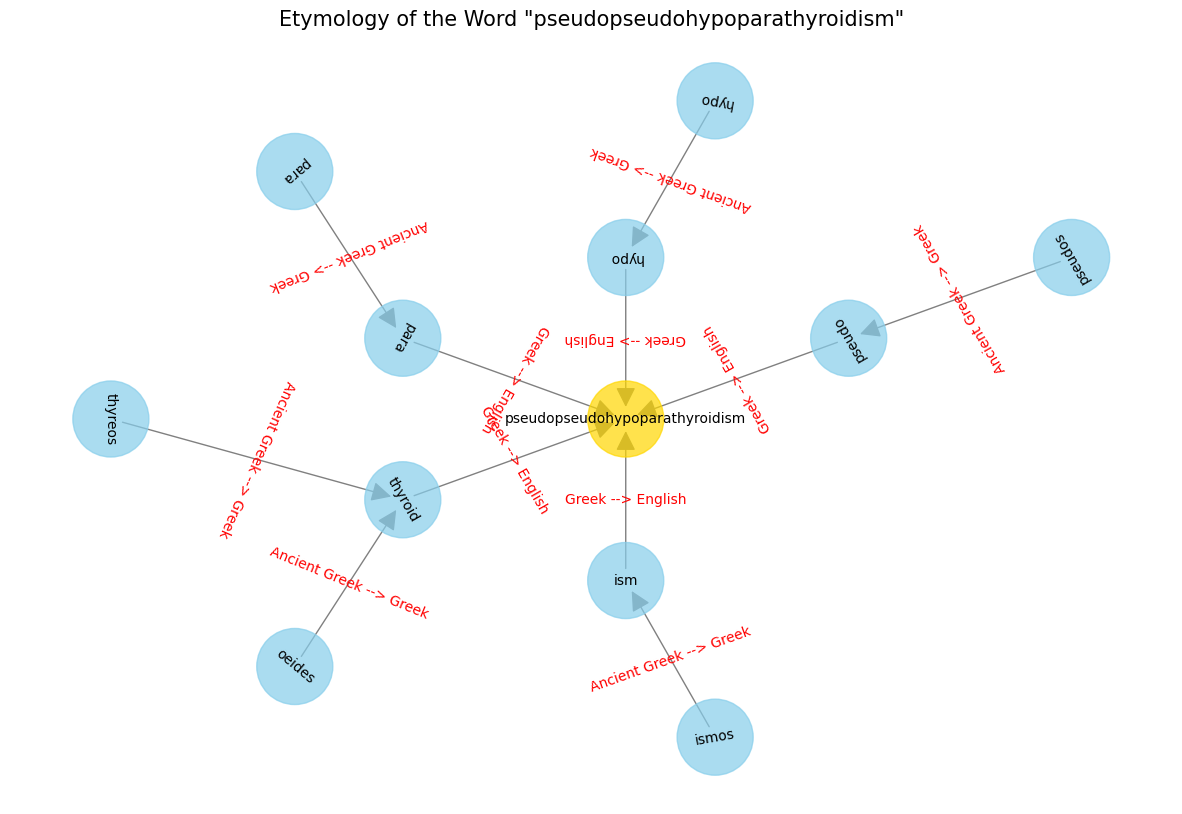

In [10]:
# Function to convert radians to degrees
def radians_to_degrees(radians):
    degrees = radians * (180 / math.pi)
    return degrees

# Function to assign unique IDs to each part of the original JSON
def assign_ids(data, current_id=0):
    data['id'] = current_id  # Assign an ID to the current level
    current_id += 1  # Increment ID for the next assignment
    for part in data.get('etymology', []):  # Recursively assign IDs to nested parts
        current_id = assign_ids(part, current_id)
    return current_id  # Return updated ID counter

# Initialize unique ID assignment
assign_ids(etymology_data)

# Create a directed graph
G = nx.DiGraph()

# Function to add nodes and edges to the graph based on the etymology data
def add_to_graph(graph, data, parent=None):
    node_id = data['id']  # Use the assigned unique ID
    node_label = data['part']  # Use part name as the node label
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    graph.add_node(node_id, **node_data, label=node_label)  # Add node with the unique ID and additional data
    if parent is not None:  # Add edge from parent to this node if parent exists
        graph.add_edge(parent, node_id)
    for child in data.get('etymology', []):  # Recursively add child nodes
        add_to_graph(graph, child, node_id)

# Adding root node and its descendants
add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"], "id": etymology_data["id"]})

# Calculate depths for each node from the root
depths = {}
def calculate_depths(node, depth=0):
    depths[node] = depth
    for successor in G.successors(node):
        calculate_depths(successor, depth+1)

root_node = next(iter(G.nodes))  # Assuming the first node is the root
calculate_depths(root_node)

# Determine the maximum depth to adjust circle sizes
max_depth = max(depths.values())

# Group nodes by depth
nodes_by_depth = {}
for node, depth in depths.items():
    if depth not in nodes_by_depth:
        nodes_by_depth[depth] = []
    nodes_by_depth[depth].append(node)

# Calculate positions with a reserved horizontal region
pos = {root_node: (0, 0)}  # Start with the root node at the center
radius_increment = 2  # Increment radius for each depth level
reserved_angle = 30  # Degrees to leave empty on each side of the horizontal axis

for depth, nodes in nodes_by_depth.items():
    if depth == 0:
        continue  # Skip the root node
    radius = depth * radius_increment
    # Adjust the total angle used for nodes to exclude the reserved horizontal region
    total_angle = 360 - (2 * reserved_angle)
    angle_increment = total_angle / len(nodes)
    start_angle = reserved_angle  # Starting angle to leave horizontal region empty
    for i, node in enumerate(nodes):
        angle = np.radians(start_angle + i * angle_increment)
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# Plotting
plt.figure(figsize=(15, 10))
node_colors = ["skyblue" if node != root_node else "gold" for node in G.nodes()]  # Different color for the root word
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

# Adjust labels and text for nodes
labels = {node: G.nodes[node]['label'] for node in G.nodes()}
for node, label in labels.items():
    x, y = pos[node]
    if node == 0:
        angle = np.degrees(np.arctan2(y, x)) 
    else:
        angle = np.degrees(np.arctan2(y, x)) + 90  # Calculate angle for text rotation
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, ha='center', va='center')

# Adjust labels and text for edges
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx)) + 90

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

plt.title('Etymology of the Word "pseudopseudohypoparathyroidism"', fontsize=15)
plt.axis('off')
plt.show()

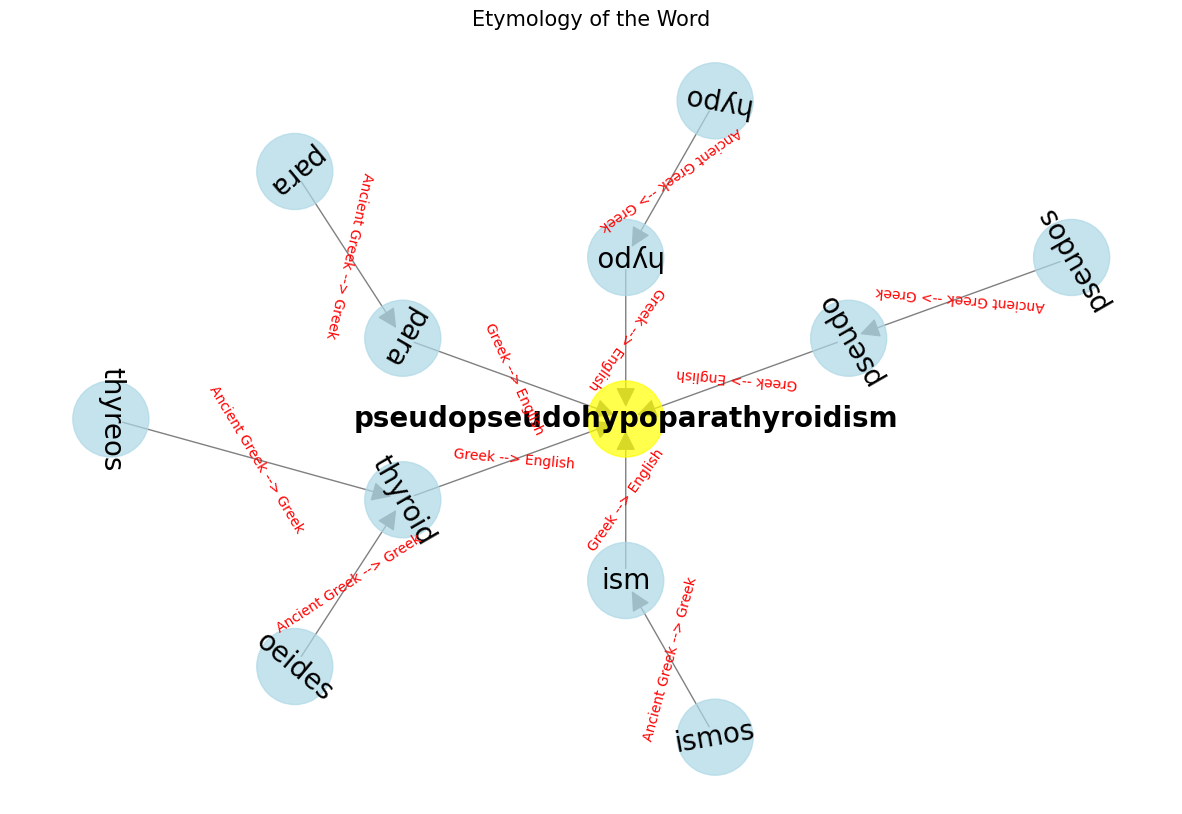

In [11]:
# Helper function to convert radians to degrees, as you've included in your instructions
def radians_to_degrees(radians):
    return radians * (180 / math.pi)

# Functions 'assign_ids' and 'add_to_graph' remain unchanged as you've specified.

# Initialize unique ID assignment
assign_ids(etymology_data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on etymology data
add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"], "id": etymology_data["id"]})

# Calculate depths for each node from the root and determine their positions
calculate_depths(root_node)

# Plotting setup
plt.figure(figsize=(15, 10))
node_colors = ["lightblue" if node != 0 else "yellow" for node in G.nodes()]  # Yellow color for the root word node
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

# Adjust node labels with specific rotation for the word node and others
for node, (x, y) in pos.items():
    if node == 0:  # Condition for the root word node to not rotate
        plt.text(x, y, G.nodes[node]['label'], fontsize=20, fontweight="bold", ha='center', va='center')
    else:  # Other nodes are rotated
        angle = np.degrees(np.arctan2(y, x)) + 90
        plt.text(x, y, G.nodes[node]['label'], rotation=angle, fontsize=20, ha='center', va='center', rotation_mode='anchor')

# Edge labels and additional texts
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx)) + 145  # Adjusting for edge labels

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

plt.title('Etymology of the Word', fontsize=15)
plt.axis('off')
plt.show()

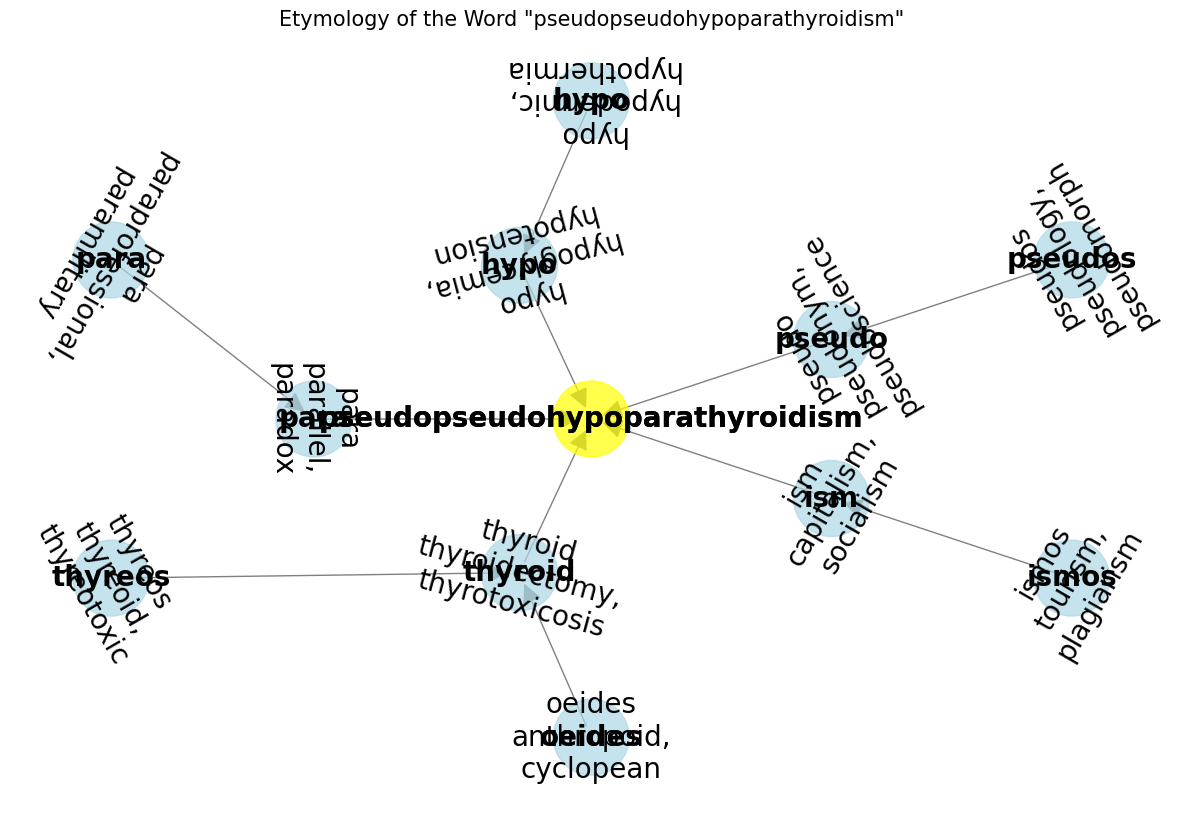

In [14]:
# Function to convert radians to degrees
def radians_to_degrees(radians):
    return radians * (180 / math.pi)

# Function to assign unique IDs to each part of the original JSON
def assign_ids(data, current_id=0):
    data['id'] = current_id  # Assign an ID to the current level
    current_id += 1  # Increment ID for the next assignment
    for part in data.get('etymology', []):  # Recursively assign IDs to nested parts
        current_id = assign_ids(part, current_id)
    return current_id  # Return updated ID counter

# Initialize unique ID assignment
assign_ids(etymology_data)

# Create a directed graph
G = nx.DiGraph()

# Function to add nodes and edges to the graph based on the etymology data
def add_to_graph(graph, data, parent=None):
    node_id = data['id']  # Use the assigned unique ID
    node_label = data['part']  # Use part name as the node label
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    graph.add_node(node_id, **node_data, label=node_label)  # Add node with the unique ID and additional data
    if parent is not None:  # Add edge from parent to this node if parent exists
        graph.add_edge(parent, node_id)
    for child in data.get('etymology', []):  # Recursively add child nodes
        add_to_graph(graph, child, node_id)

# Adding root node and its descendants
add_to_graph(G, {"part": etymology_data["word"], "language": etymology_data["language"], "meaning": etymology_data["meaning"], "etymology": etymology_data["etymology"], "id": etymology_data["id"]})

# Calculate depths for each node from the root
depths = {}
def calculate_depths(node, depth=0):
    depths[node] = depth
    for successor in G.successors(node):
        calculate_depths(successor, depth+1)

# Assuming the first node is the root
root_node = next(iter(G.nodes))
calculate_depths(root_node)

# Determine the maximum depth to adjust circle sizes
max_depth = max(depths.values())

# Group nodes by depth
nodes_by_depth = {}
for node, depth in depths.items():
    if depth not in nodes_by_depth:
        nodes_by_depth[depth] = []
    nodes_by_depth[depth].append(node)

# Calculate positions with a reserved horizontal region
pos = {}
radius_increment = 2  # Increment radius for each depth level
reserved_angle = 30  # Degrees to leave empty on each side of the horizontal axis

for depth, nodes in nodes_by_depth.items():
    radius = depth * radius_increment
    total_angle = 360 - (2 * reserved_angle)
    angle_increment = total_angle / max(1, (len(nodes) - 1))  # Avoid division by zero
    start_angle = reserved_angle + angle_increment / 2 if depth == 0 else reserved_angle  # Center root if it's the only node

    for i, node in enumerate(nodes):
        angle = np.radians(start_angle + i * angle_increment)
        pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# Plotting
plt.figure(figsize=(15, 10))
node_colors = ["lightblue" if node != 0 else "yellow" for node in G.nodes()]  # Yellow color for the root word node
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

# Use the 'label' attribute for node labels instead of the node ID
# labels = {node: G.nodes[node]['label'] for node in G.nodes}
# nx.draw_networkx_labels(G, pos, labels=labels, font_size=20, font_weight="bold")

# Adjusting labels for nodes, including example words
for node, (x, y) in pos.items():
    label = G.nodes[node]['label']
    examples = G.nodes[node].get('example_words', [])
    # wrapped_text = textwrap.fill(examples, width=20)
    if examples:
        # label += "\n" + ", ".join(examples)  # Append example words to the label
        label += "\n" + ",\n".join(examples)  # Append example words to the label
    if node == 0:  # Condition for the root word node to not rotate
        plt.text(x, y, label, fontsize=20, fontweight="bold", ha='center', va='center')
    else:  # Other nodes are rotated
        angle = np.degrees(np.arctan2(y, x)) + 90
        plt.text(x, y, label, rotation=angle, fontsize=20, ha='center', va='center', rotation_mode='anchor')

# for node, (x, y) in pos.items():
#     examples = ", ".join(G.nodes[node].get('example_words', []))
#     wrapped_text = textwrap.fill(examples, width=20)
#     plt.text(x, y - 0.1, wrapped_text, fontsize=14, ha='center', va='top', wrap=True)
        
plt.title(f'Etymology of the Word "{etymology_data["word"]}"', fontsize=15)
plt.axis('off')
plt.show()

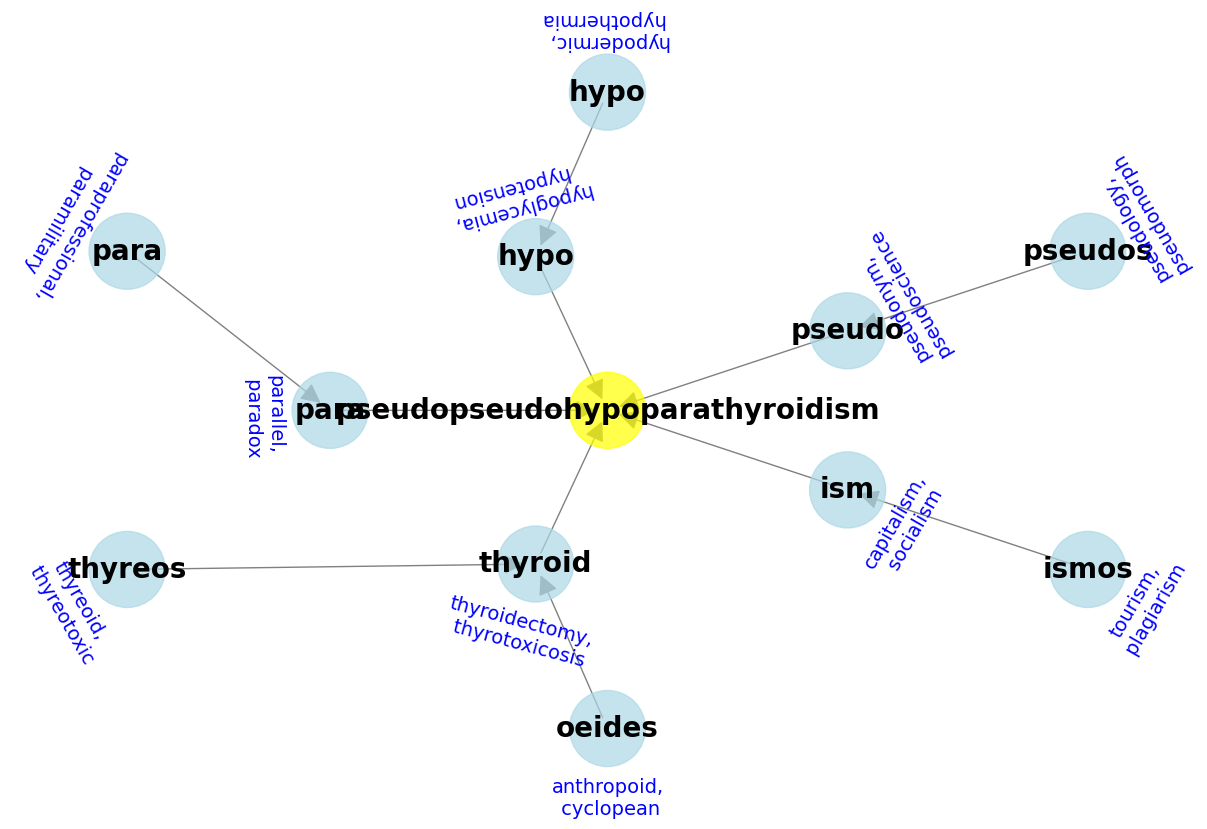

In [20]:
# Plotting with differentiated font sizes for part names and example words
plt.figure(figsize=(15, 10))
node_colors = ["lightblue" if node != 0 else "yellow" for node in G.nodes()]  # Yellow color for the root word node
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")

for node, (x, y) in pos.items():
    label = G.nodes[node]['label']
    examples = G.nodes[node].get('example_words', [])
    if examples:
        example_text = "\n\n\n\n\n\n" + ",\n ".join(examples)  # Concatenate example words into a single string
    else:
        example_text = ""

    # Position adjustments for example words to appear below the part name
    examples_offset = -0.05  # Adjust as necessary for your visualization

    # Draw the part name with larger font
    plt.text(x, y, label, fontsize=20, fontweight="bold", ha='center', va='center', color='black')

    if node != 0:  # Rotate other nodes except the root word node
        angle = np.degrees(np.arctan2(y, x)) + 90
        plt.text(x, y + examples_offset, example_text, rotation=angle, fontsize=14, ha='center', va='center', color='blue', rotation_mode='anchor')
    else:
        # For the root word node, keep the examples non-rotated and in smaller font size
        plt.text(x, y + examples_offset, example_text, fontsize=14, ha='center', va='center', color='blue')

# plt.title(f'Etymology of the Word "{etymology_data["word"]}"', fontsize=15)
plt.axis('off')
plt.show()